## Here we will set up the simple model without the clouds first

In [1]:
import context
from Integrator_Functions import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from Additional_Functions import create_interp_T, create_interp_solar, create_interp_albedo, temp_ave, create_clouds

class Integ71(Integrator):
    def set_yinit(self):

        ## Set up the latitude array:
        latitudes = np.arange(0, 91, 1)
            
        # Set up the needed constants for the derivation
        solar_arr = create_interp_solar(latitudes)
        albedo_arr = create_interp_albedo(latitudes)
        cloud_arr = create_clouds()
        constants = namedtuple('constants', ['solar', 'albedo', 'clouds'])
        self.initvars = constants(solar_arr, albedo_arr, cloud_arr)

        ## Set up the initial temperature array
        interp_temp = create_interp_T(latitudes)
        self.yinit = interp_temp

        # Set the integrator to array of length 91
        self.nvars = 91
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """arrs.solar=solar insolation
           arrs.albedo=albedo


           returns dT/dt
        """
        ## derivtive is dT/dt = (1/cp)*[(1-arrs.albedo)*arrs.solar - A - B*Temp - F*(Temp-Tavg)]
        As = 315
        Bs = 4.6
        Ac = 201
        Bc = 3.12
        cp = 2.08e8
        F = 3.8
        gamma = 9.8
        Tavg = temp_ave(y)
        Temp = y[0]
        arrs = self.initvars
        f = (1/cp)*((1-arrs.albedo)*(1-arrs.clouds)*arrs.solar - As - Bs*Temp - F*(Temp-Tavg) + Ac + Bc*(Temp - 258.15))
        return f
    

******************************
context imported. Front of path:
C:\Users\13432\Documents\ATSC_409\numeric_2024
back of path: C:\Users\13432\miniconda3\envs\numeric_2024\Lib\site-packages\Pythonwin
******************************

through C:\Users\13432\Documents\ATSC_409\numeric_2024\Project\ATSC409\context.py


In [2]:
## This cell will be used to set up the class we will need to override the derivs function
## Used for testing the integrator atm

theSolver = Integ71('init_conds_simple.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

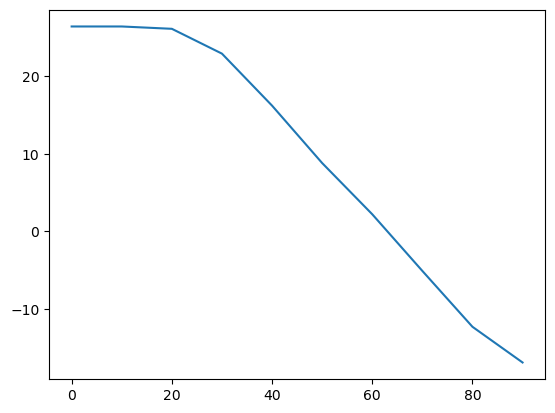

In [3]:
initial = yVals[0]
end = yVals[-1]
lat = np.arange(0, 91, 1)

plt.plot(lat, initial)

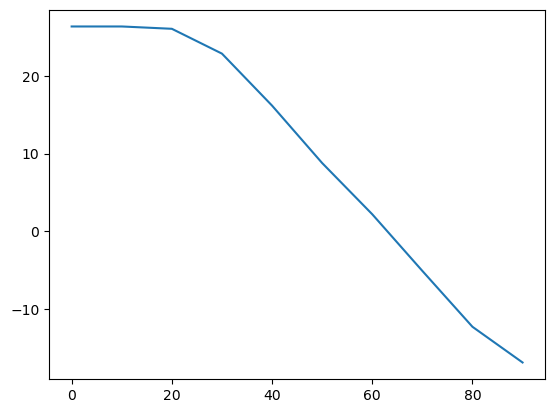

In [4]:
plt.plot(lat, end)

Text(0.5, 0, 'Latitude')

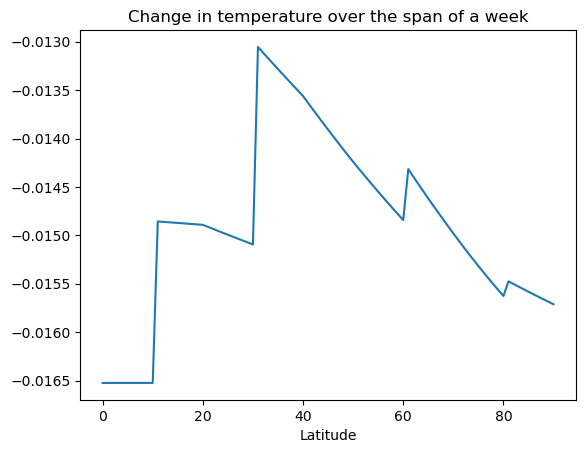

In [5]:
difference = end - initial
plt.plot(lat, difference)
plt.title('Change in temperature over the span of a week')
plt.xlabel('Latitude')

In [6]:
# equator = np.array([0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9, 0.9, 0.9]) # 11 elements
# tropical = np.full(20,0.65) # 20 elements
# mid_latitude = np.full(30, 0.3) # 30 elements
# sub_polar = np.full(20, 0.12) # 20 elements
# polar = np.full(10, 0.02) # 10 elements
# clouds = np.concatenate((equator,tropical, mid_latitude, sub_polar, polar))
